#### Data Set Investigation

In [127]:
import ast
import re
import numpy as np
import os
import gmaps
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline
#surveys_copy= surveys_df.copy()

In [128]:
df_s_listings = pd.read_csv('s_listings.csv')
df_s_calender = pd.read_csv('s_calendar.csv')
df_s_reviews  = pd.read_csv('s_reviews.csv')
df_s_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [129]:
df_b_listings = pd.read_csv('b_listings.csv')
df_b_calender = pd.read_csv('b_calendar.csv')
df_b_reviews  = pd.read_csv('b_reviews.csv')
df_b_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [130]:
df_s_listings.shape

(3818, 92)

In [131]:
df_b_listings.shape

(3585, 95)

In [132]:
df_s_calender.shape

(1393570, 4)

In [133]:
df_b_calender.shape

(1308890, 4)

In [134]:
df_s_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [135]:
df_b_calender.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [136]:
df_s_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [137]:
df_b_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [138]:
df_s_reviews.shape


(84849, 6)

In [139]:
df_s_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [140]:
col_names = list(df_s_listings)
col_names

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [141]:
## Which columns have no missing values

df_b_listings.columns[~df_b_listings.isnull().any()].tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_cleansed',
 'state',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count']

In [142]:
## Which columns have no missing values

df_b_listings.columns[~df_b_listings.isnull().any()].tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_cleansed',
 'state',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count']

In [143]:
## Which columns have no missing values

df_s_listings.columns[~df_s_listings.isnull().any()].tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_verifications',
 'street',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count']

In [144]:
df_s_calender.columns[~df_s_calender.isnull().any()].tolist()

['listing_id', 'date', 'available']

In [145]:
## Which columns have missing values
df_s_listings.columns[df_s_listings.isnull().any()].tolist()

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [146]:
## Which columns have all missing values
df_s_listings.columns[df_s_listings.isnull().all()].tolist()

['license']

In [147]:
## Which columns have all missing values
df_b_listings.columns[df_b_listings.isnull().all()].tolist()

['neighbourhood_group_cleansed',
 'has_availability',
 'license',
 'jurisdiction_names']

In [148]:
## Check the count of missing values in each column
df_s_listings.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

In [149]:
## Check the count of missing values in each column
df_b_listings.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed        3585
jurisdiction_names                  3585
license                             3585
has_availability                    3585
square_feet                         3529
monthly_price                       2697
weekly_price                        2693
security_deposit                    2243
notes                               1975
interaction                         1554
access                              1489
neighborhood_overview               1415
host_about                          1309
transit                             1290
house_rules                         1192
cleaning_fee                        1107
space                               1057
review_scores_accuracy               823
review_scores_location               822
review_scores_value                  821
review_scores_checkin                820
review_scores_cleanliness            818
review_scores_communication          818
review_scores_rating                 813
reviews_per_mont

In [150]:
## rows with more than  75% missing rows - These rows  can be dropped.

most_missing_rows = sum(df_b_listings.isnull().sum(axis=1)/df_b_listings.shape[1] > .75)
most_missing_rows

0

### Let's take a look at the first question, I've had a look at the columns and I'd look to see what locations or areas have the highest earning Airbnb 



In [151]:
## Property subset to get hightest earning locations

prop_rates = df_s_listings[['id','street','property_type','price','bedrooms','neighbourhood','city','zipcode', 'latitude',
 'longitude']]

In [152]:
prop_rates.head()

,id,street,property_type,price,bedrooms,neighbourhood,city,zipcode,latitude,longitude
0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,$85.00,1.0,Queen Anne,Seattle,98119,47.636289,-122.371025
1,953595,"7th Avenue West, Seattle, WA 98119, United States",Apartment,$150.00,1.0,Queen Anne,Seattle,98119,47.639123,-122.365666
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,$975.00,5.0,Queen Anne,Seattle,98119,47.629724,-122.369483
3,7421966,"8th Avenue West, Seattle, WA 98119, United States",Apartment,$100.00,0.0,Queen Anne,Seattle,98119,47.638473,-122.369279
4,278830,"14th Ave W, Seattle, WA 98119, United States",House,$450.00,3.0,Queen Anne,Seattle,98119,47.632918,-122.372471


In [153]:
prop_rates.select_dtypes(include=['object', 'category'])

,street,property_type,price,neighbourhood,city,zipcode
0,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,$85.00,Queen Anne,Seattle,98119
1,"7th Avenue West, Seattle, WA 98119, United States",Apartment,$150.00,Queen Anne,Seattle,98119
2,"West Lee Street, Seattle, WA 98119, United States",House,$975.00,Queen Anne,Seattle,98119
3,"8th Avenue West, Seattle, WA 98119, United States",Apartment,$100.00,Queen Anne,Seattle,98119
4,"14th Ave W, Seattle, WA 98119, United States",House,$450.00,Queen Anne,Seattle,98119
5,"West Comstock Street, Seattle, WA 98119, Unite...",House,$120.00,Queen Anne,Seattle,98119
6,"10th Avenue West, Seattle, WA 98119, United St...",House,$80.00,Queen Anne,Seattle,98119
7,"West Wheeler Street, Seattle, WA 98119, United...",Cabin,$60.00,Queen Anne,Seattle,98119
8,"Queen Anne Avenue North, Seattle, WA 98109, Un...",Apartment,$90.00,Queen Anne,Seattle,98109
9,"7th Avenue West, Seattle, WA 98119, United States",Apartment,$150.00,Queen Anne,Seattle,98119


In [154]:
prop_rates.price = prop_rates.price.str.replace('$','')
prop_rates.price = prop_rates.price.str.replace(',','')
prop_rates.price = prop_rates.price.astype(float)


/Users/tobikasali/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [155]:
prop_rates.head()

,id,street,property_type,price,bedrooms,neighbourhood,city,zipcode,latitude,longitude
0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,85.0,1.0,Queen Anne,Seattle,98119,47.636289,-122.371025
1,953595,"7th Avenue West, Seattle, WA 98119, United States",Apartment,150.0,1.0,Queen Anne,Seattle,98119,47.639123,-122.365666
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,975.0,5.0,Queen Anne,Seattle,98119,47.629724,-122.369483
3,7421966,"8th Avenue West, Seattle, WA 98119, United States",Apartment,100.0,0.0,Queen Anne,Seattle,98119,47.638473,-122.369279
4,278830,"14th Ave W, Seattle, WA 98119, United States",House,450.0,3.0,Queen Anne,Seattle,98119,47.632918,-122.372471


In [156]:
prop_rates.sort_values(by=['price','bedrooms'], ascending=False)



,id,street,property_type,price,bedrooms,neighbourhood,city,zipcode,latitude,longitude
3122,4825073,"16th Avenue Northeast, Seattle, WA 98115, Unit...",House,1000.0,2.0,Ravenna,Seattle,98115,47.683364,-122.311467
1208,3345341,"8th Avenue, Seattle, WA 98101, United States",Apartment,999.0,1.0,Belltown,Seattle,98101,47.615379,-122.335259
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,975.0,5.0,Queen Anne,Seattle,98119,47.629724,-122.369483
3443,2720963,"25th Avenue West, Seattle, WA 98199, United St...",House,950.0,3.0,Magnolia,Seattle,98199,47.641620,-122.389725
1279,4464824,"2nd Avenue, Seattle, WA 98121, United States",Apartment,899.0,3.0,Belltown,Seattle,98121,47.615165,-122.346572
565,5534463,"Westlake Avenue North, Seattle, WA 98109, Unit...",Boat,775.0,4.0,Westlake,Seattle,98109,47.631674,-122.340508
2518,2459519,"10th Avenue East, Seattle, WA 98102, United St...",House,750.0,6.0,Portage Bay,Seattle,98102,47.645749,-122.318581
2566,2350464,"14th Avenue East, Seattle, WA 98112, United St...",House,750.0,4.0,Montlake,Seattle,98112,47.637444,-122.314427
239,7733192,"Taylor Avenue North, Seattle, WA 98109, United...",House,749.0,3.0,Queen Anne,Seattle,98109,47.632756,-122.346987
19,6291829,"1st Avenue West, Seattle, WA 98119, United States",House,700.0,5.0,Queen Anne,Seattle,98119,47.636025,-122.358694


Having looked at the prices above, I can't just sort to get the highest prices because some properties have more rooms and this is usally reflected in the price.  I can going to get a price per room and use that to get the most expensive AirBnB properties.



In [157]:
## To avoid division errors, I will check if there are any properties with 0 or Nan values for the number of bedrooms.
## I'll remove these 378
zero_beds = sum(prop_rates['bedrooms'] == 0)
missing_beds = sum(prop_rates['bedrooms'].isnull())

total = zero_beds + missing_beds
total               

378

In [158]:
prop_rates = prop_rates.dropna(subset=['bedrooms'])  
clean_prop = prop_rates[(prop_rates['bedrooms'] != 0)]

In [159]:
zero_beds = sum(clean_prop['bedrooms'] == 0)
missing_beds = sum(clean_prop['bedrooms'].isnull())

total = zero_beds + missing_beds
total   

0

In [160]:
clean_prop['price_per_room'] = clean_prop['price']/clean_prop['bedrooms']
clean_prop.head()

/Users/tobikasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,street,property_type,price,bedrooms,neighbourhood,city,zipcode,latitude,longitude,price_per_room
0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,85.0,1.0,Queen Anne,Seattle,98119,47.636289,-122.371025,85.0
1,953595,"7th Avenue West, Seattle, WA 98119, United States",Apartment,150.0,1.0,Queen Anne,Seattle,98119,47.639123,-122.365666,150.0
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,975.0,5.0,Queen Anne,Seattle,98119,47.629724,-122.369483,195.0
4,278830,"14th Ave W, Seattle, WA 98119, United States",House,450.0,3.0,Queen Anne,Seattle,98119,47.632918,-122.372471,150.0
5,5956968,"West Comstock Street, Seattle, WA 98119, Unite...",House,120.0,1.0,Queen Anne,Seattle,98119,47.630525,-122.366174,120.0


In [161]:
clean_prop.sort_values(by=['price_per_room','bedrooms','price'], ascending=False)

,id,street,property_type,price,bedrooms,neighbourhood,city,zipcode,latitude,longitude,price_per_room
1208,3345341,"8th Avenue, Seattle, WA 98101, United States",Apartment,999.0,1.0,Belltown,Seattle,98101,47.615379,-122.335259,999.000000
3436,3413183,"20th Avenue West, Seattle, WA 98199, United St...",Apartment,550.0,1.0,Magnolia,Seattle,98199,47.648067,-122.382861,550.000000
3122,4825073,"16th Avenue Northeast, Seattle, WA 98115, Unit...",House,1000.0,2.0,Ravenna,Seattle,98115,47.683364,-122.311467,500.000000
1760,9174507,"Southwest Hanford Street, Seattle, WA 98116, U...",House,399.0,1.0,Alki,Seattle,98116,47.574940,-122.404551,399.000000
1498,7350870,"1st Avenue, Seattle, WA 98101, United States",Apartment,365.0,1.0,Central Business District,Seattle,98101,47.606624,-122.337337,365.000000
1090,9634448,"2nd Avenue, Seattle, WA 98101, United States",Condominium,357.0,1.0,Pike Place Market,Seattle,98101,47.608931,-122.340282,357.000000
1298,9497431,"Stewart Street, Seattle, WA 98101, United States",Condominium,700.0,2.0,Belltown,Seattle,98101,47.615878,-122.333256,350.000000
1312,8891577,"Stewart Street, Seattle, WA 98101, United States",Condominium,700.0,2.0,Belltown,Seattle,98101,47.615205,-122.335459,350.000000
1701,3497530,"Western Avenue, Seattle, WA 98104, United States",Apartment,350.0,1.0,Central Business District,Seattle,98104,47.602794,-122.335644,350.000000
3443,2720963,"25th Avenue West, Seattle, WA 98199, United St...",House,950.0,3.0,Magnolia,Seattle,98199,47.641620,-122.389725,316.666667


In [162]:
prices_zip = clean_prop[['zipcode', 'price_per_room']]
avg_prices = prices_zip.groupby(['zipcode']).mean().sort_values(by=['price_per_room'],ascending=False)

In [163]:
avg_prices

,price_per_room
zipcode,
98134,152.000000
98101,136.602713
98121,125.713647
98104,124.740741
98109,116.070479
98119,105.156168
98199,101.582011
98102,101.505042
98112,96.511416


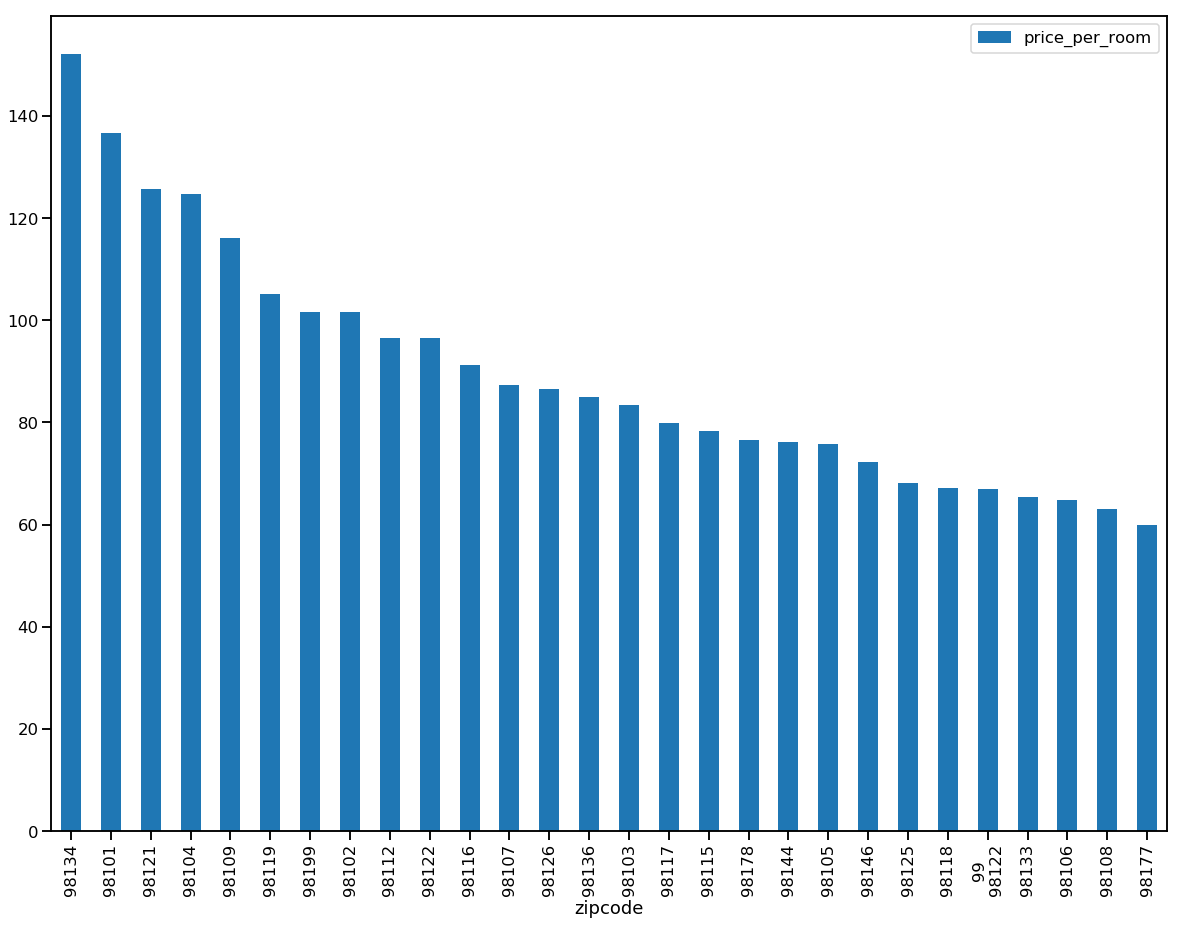

In [164]:
avg_prices.plot(kind='bar', width=0.5, zorder=1,figsize=(20,15))

Looking at this chart, you can see that the post code 98134 has the highest average past, however, the averages may vary and be skewed depending on the number of apartments in this zipcode. So I would look at the average number of listings in a post code and remove zip codes with those far less than that.

In [165]:
## Get the names of street in the highest postcode - put the street on a map
best_priced_location = clean_prop[(clean_prop.zipcode == '98134') | (clean_prop.zipcode == '98101')].sort_values(by=['zipcode','price_per_room'],ascending=False)


In [166]:
best_priced_location

,id,street,property_type,price,bedrooms,neighbourhood,city,zipcode,latitude,longitude,price_per_room
1925,2919571,"Airport Way South, Seattle, WA 98134, United S...",Loft,320.0,2.0,Industrial District,Seattle,98134,47.577590,-122.319566,160.0
1926,1484651,"Airport Way South, Seattle, WA 98134, United S...",Other,150.0,1.0,Industrial District,Seattle,98134,47.576687,-122.321928,150.0
1694,789229,"Occidental Ave S, Seattle, WA 98134, United St...",Apartment,149.0,1.0,Pioneer Square,Seattle,98134,47.595828,-122.332346,149.0
1703,1080097,"1st Avenue South, Seattle, WA 98134, United St...",Loft,149.0,1.0,Pioneer Square,Seattle,98134,47.593862,-122.334495,149.0
1208,3345341,"8th Avenue, Seattle, WA 98101, United States",Apartment,999.0,1.0,Belltown,Seattle,98101,47.615379,-122.335259,999.0
1498,7350870,"1st Avenue, Seattle, WA 98101, United States",Apartment,365.0,1.0,Central Business District,Seattle,98101,47.606624,-122.337337,365.0
1090,9634448,"2nd Avenue, Seattle, WA 98101, United States",Condominium,357.0,1.0,Pike Place Market,Seattle,98101,47.608931,-122.340282,357.0
1298,9497431,"Stewart Street, Seattle, WA 98101, United States",Condominium,700.0,2.0,Belltown,Seattle,98101,47.615878,-122.333256,350.0
1312,8891577,"Stewart Street, Seattle, WA 98101, United States",Condominium,700.0,2.0,Belltown,Seattle,98101,47.615205,-122.335459,350.0
1483,7332364,"Olive Way, Seattle, WA 98101, United States",Apartment,300.0,1.0,Central Business District,Seattle,98101,47.614344,-122.332938,300.0


In [167]:
seattle_coordinates = (47.608013, -122.335167)
fig = gmaps.figure(center=seattle_coordinates, zoom_level=12)
markers = gmaps.marker_layer(best_priced_location[['latitude', 'longitude']])
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

It appears that the most expensive AirBnB's are closer to the sea front and water front park which has a lot of attractions. The promiximity to these attractions may be one of the reasons this location has the highest average price.

###Question 3; Compare rates between seattle and boston



In [168]:
def clean_props(df):
    ## Select the columns needed
    prop_rates = df[['id','street','property_type','price','bedrooms','accommodates','neighbourhood','city','zipcode', 'latitude','longitude']]
    
    ##  clean the price column
    prop_rates.price = prop_rates.price.str.replace('$','')
    prop_rates.price = prop_rates.price.str.replace(',','')
    prop_rates.price = prop_rates.price.astype(float)
    
    ## remove 0 bedrooms to avoid division errors
    
    prop_rates = prop_rates.dropna(subset=['bedrooms'])  
    clean_prop = prop_rates[(prop_rates['bedrooms'] != 0)]
    
    ## Get the price per room and price per person
    
    clean_prop['price_per_room'] = clean_prop['price']/clean_prop['bedrooms']
    clean_prop['price_per_person'] = clean_prop['price']/clean_prop['accommodates']
    
    ## Get the average price per room per zip code
    
    prices_zip = clean_prop[['zipcode', 'price_per_room']]
    avg_prices_zip = prices_zip.groupby(['zipcode']).mean().sort_values(by=['price_per_room'],ascending=False)
    
    ## Get the average price per person per property type
    
    prices_prop = clean_prop[['property_type', 'price_per_person']]
    avg_prices_prop = prices_prop.groupby(['property_type']).mean().sort_values(by=['price_per_person'],ascending=False)
    
    return prices_zip,avg_prices_zip,prices_prop,avg_prices_prop

In [169]:
b_prices_zip, b_avg_prices_zip,b_prices_prop,b_avg_prices_props = clean_props(df_b_listings)
s_prices_zip, s_avg_prices_zip,s_prices_prop,s_avg_prices_props = clean_props(df_s_listings)

/Users/tobikasali/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/tobikasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tobikasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [170]:
b_avg_prices_props

,price_per_person
property_type,
Other,132.338235
Guesthouse,72.250000
Loft,69.029018
Condominium,65.594919
Bed & Breakfast,65.579268
Apartment,64.572292
Townhouse,62.387143
Villa,55.291667
Boat,53.851190


In [171]:
s_avg_prices_props

,price_per_person
property_type,
Boat,84.682292
Bed & Breakfast,56.828829
Loft,52.580864
Condominium,48.645977
Chalet,47.875000
Cabin,45.362745
Apartment,42.759864
Other,41.781250
Townhouse,40.031853


In [172]:
s_avg_prices_props = s_avg_prices_props.reset_index()
b_avg_prices_props = b_avg_prices_props.reset_index()

In [173]:
s_avg_prices_props['city'] = 'Seattle'

b_avg_prices_props['city'] = 'Boston'

In [174]:
s_avg_prices_props.head()

,property_type,price_per_person,city
0,Boat,84.682292,Seattle
1,Bed & Breakfast,56.828829,Seattle
2,Loft,52.580864,Seattle
3,Condominium,48.645977,Seattle
4,Chalet,47.875000,Seattle


In [175]:
b_avg_prices_props.head()

,property_type,price_per_person,city
0,Other,132.338235,Boston
1,Guesthouse,72.250000,Boston
2,Loft,69.029018,Boston
3,Condominium,65.594919,Boston
4,Bed & Breakfast,65.579268,Boston


In [176]:
prop_price_pp = b_avg_prices_props.append(s_avg_prices_props)

In [177]:
prop_price_pp_sort = prop_price_pp.sort_values(by=['price_per_person'],ascending=False)

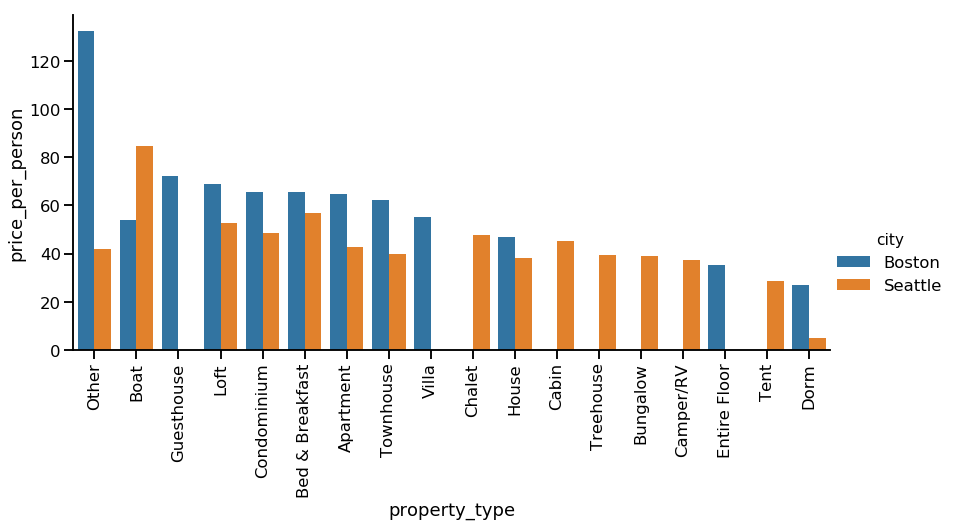

In [178]:

# the size of A4 paper

sns.set_context("talk")
grid = sns.catplot(x="property_type", y="price_per_person", hue="city", kind="bar", height=6, aspect=2, data=prop_price_pp_sort) 
grid.set_xticklabels(rotation=90)
plt.show()

### On average the rates per person is more in Boston than Seattke except for when renting a Boat; when seattle is more expensive. 

In [179]:
### Finding the factors that affect AirBnB prices

In [180]:
list_str =[]
list_numeric =[]
list_str = df_s_listings.select_dtypes(['object']).columns
list_numeric = df_s_listings.select_dtypes(['number']).columns

In [181]:
print (len(list_str))
print (len(list_numeric))

62
30


In [182]:
list_str

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [183]:
list_numeric

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [184]:
### first let's make a copy for prediction

df_s_listings_ML = df_s_listings.copy()

In [185]:
df_s_listings_ML[['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365']].head()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,NaN,2,1,365,14,41,71,346
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,NaN,1,2,90,13,13,16,291
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,NaN,10,4,30,1,6,17,220
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,NaN,1,1,1125,0,0,0,143
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,NaN,6,1,1125,30,60,90,365


In [186]:
## Removing Randomely ganerated fields and fields that are id fields.

gp_n_1 = ['id', 'scrape_id', 'host_id', 'host_listings_count','latitude', 'longitude']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_n_1, axis=1)

In [187]:
df_s_listings_ML[['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month']].head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89


In [188]:
## Reviewing the first batch of object columns, I'm going to drop all these columns because they are mostly text and I'm not analysing the text in the columns except last_scraped and I'll investiage what do later.


df_s_listings_ML[['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url']].head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/ac/pictures/6120468/b0...


In [189]:
gp_1 = ['listing_url', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_1)

In [190]:
df_s_listings_ML[['xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood']].head()

,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood
0,NaN,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne
1,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne
2,NaN,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne
3,NaN,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne
4,NaN,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne


In [191]:
## In this group I will also drop columns that have url pictures  and other columns that have unique values  as these won't add any valuee to the Alogorithm
## Additionally, I will be dropping any columns that have text that we wpn't be analysing either. Also columns with all the samev values 
## will also be dropped like Host location 
gp_bin = ['host_is_superhost']
gp_2 = ['xl_picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url', 'host_picture_url']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_2)

In [192]:
df_s_listings_ML[['host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact']].head()

,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact
0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
1,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
2,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
4,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t


In [193]:
## Additionally, I will be dropping any columns that have text that we wpn't be analysing either. Also columns with all the samev values 
## will also be dropped like Host location 
## I'll also drop columns that prodie redundant information

gp_bin.append('host_has_profile_pic')
gp_bin.append('host_identity_verified')
gp_3 = ['host_verifications','street','neighbourhood_cleansed','neighbourhood_group_cleansed','city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_3)


In [194]:
df_s_listings_ML[['property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',]].head()

,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,NaN,NaN,$5.00,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,today,t,2016-01-04,2013-08-19,2015-12-29
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03
3,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$650.00,"$2,300.00",NaN,NaN,$0.00,6 months ago,t,2016-01-04,NaN,NaN
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,NaN,NaN,$700.00,$125.00,$15.00,7 weeks ago,t,2016-01-04,2012-07-10,2015-10-24


In [195]:
##  I will also drop features that can leak information about the price.. .Like weekly or monthly_price. 
## I'll aslo take out amenities because it requires too much processing

gp_bin.append('has_availability')
gp_4 = ['amenities', 'monthly_price','weekly_price','calendar_last_scraped', 'calendar_updated']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_4)

In [196]:
df_s_listings_ML[['requires_license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification']].head()

,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,f,WASHINGTON,f,moderate,f,f
1,f,WASHINGTON,f,strict,t,t
2,f,WASHINGTON,f,strict,f,f
3,f,WASHINGTON,f,flexible,f,f
4,f,WASHINGTON,f,strict,f,f


In [197]:
gp_bin.append('requires_license')
gp_bin.append('instant_bookable')
gp_bin.append('require_guest_profile_picture')
gp_bin.append('require_guest_phone_verification')
gp_5 = ['jurisdiction_names']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_5)

In [198]:
gp_bin

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [199]:
df_s_listings_ML.shape

(3818, 49)

In [200]:
### Change all True or False columns to 0 or 1
### Remove al columns with the same value  -F
### Remove all columns with more than 25% missing valies -F
### Remove all rows with more than 40% missig values -F
### fill in numerical with median
### Change remaining categorical columns to 1 and 0's
### Do linear regression
### Select top 5 indicators



In [201]:
## column names that have more than 75% if their values missing - This columns can be dropped.


most_missing_cols = set(df_s_listings_ML.columns[df_s_listings_ML.isnull().sum()/len(df_s_listings_ML) > .25])
most_missing_cols

{'cleaning_fee', 'license', 'security_deposit', 'square_feet'}

In [202]:
df_s_listings_ML = df_s_listings_ML.drop(columns=most_missing_cols)

In [203]:
## Check the count of missing values in each column
df_s_listings_ML.isnull().sum().sort_values(ascending=False)

host_acceptance_rate                773
review_scores_checkin               658
review_scores_accuracy              658
review_scores_value                 656
review_scores_location              655
review_scores_cleanliness           653
review_scores_communication         651
review_scores_rating                647
first_review                        627
last_review                         627
reviews_per_month                   627
host_response_rate                  523
neighbourhood                       416
host_neighbourhood                  300
bathrooms                            16
zipcode                               7
bedrooms                              6
host_is_superhost                     2
host_since                            2
host_total_listings_count             2
host_has_profile_pic                  2
host_identity_verified                2
property_type                         1
beds                                  1
bed_type                              0


In [204]:
## I really can't do much with the first and last review rows in terms of filling up the column siwth mean or median values so 
## I will remove them, I can't fill in neighbourhood as well.
difficult_features= ['first_review','last_review','reviews_per_month', 'neighbourhood','host_neighbourhood','last_scraped','host_since' ]
df_s_listings_ML = df_s_listings_ML.drop(columns=difficult_features)


In [205]:
df_s_listings_ML.shape

(3818, 38)

In [206]:
## rKeep only rows with have up to 70% of their row data

most_missing_rows = sum(df_s_listings_ML.isnull().sum(axis=1)/df_s_listings_ML.shape[1] < .30)
most_missing_rows

3816

In [207]:
df_s_listings_ML = df_s_listings_ML[df_s_listings_ML.isnull().sum(axis=1)/df_s_listings_ML.shape[1] < .30]

In [208]:
df_s_listings_ML.nunique()

host_response_rate                   45
host_acceptance_rate                  2
host_is_superhost                     2
host_total_listings_count            27
host_has_profile_pic                  2
host_identity_verified                2
zipcode                              28
property_type                        16
room_type                             3
accommodates                         15
bathrooms                            12
bedrooms                              8
beds                                 11
bed_type                              5
price                               273
guests_included                      15
extra_people                         45
minimum_nights                       22
maximum_nights                       68
has_availability                      1
availability_30                      31
availability_60                      61
availability_90                      91
availability_365                    363
number_of_reviews                   195


In [209]:
##Drop columns with only one value

single_features= ['requires_license','has_availability']
df_s_listings_ML = df_s_listings_ML.drop(columns=single_features)

In [210]:
df_s_listings_ML.shape

(3816, 36)

In [211]:
df_s_listings_ML.isnull().sum().sort_values(ascending=False)

host_acceptance_rate                771
review_scores_accuracy              656
review_scores_checkin               656
review_scores_value                 654
review_scores_location              653
review_scores_cleanliness           651
review_scores_communication         649
review_scores_rating                645
host_response_rate                  521
bathrooms                            16
zipcode                               7
bedrooms                              6
property_type                         1
beds                                  1
host_total_listings_count             0
bed_type                              0
host_is_superhost                     0
host_has_profile_pic                  0
host_identity_verified                0
room_type                             0
accommodates                          0
calculated_host_listings_count        0
price                                 0
guests_included                       0
extra_people                          0


In [212]:
## Change all true and false to 1 and 0

gp_bin.remove('has_availability')
gp_bin.remove('requires_license')
gp_bin

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [213]:
for col in gp_bin:
    df_s_listings_ML[col].replace('t', 1, inplace=True)
    df_s_listings_ML[col].replace('f', 0, inplace=True)

In [214]:
###Use median value as for the review scores

medianfill = ['review_scores_checkin','review_scores_accuracy', 'review_scores_value','review_scores_location','review_scores_cleanliness','review_scores_communication','review_scores_rating'] 
for col in medianfill:
    median = df_s_listings_ML[col].median()
    df_s_listings_ML[col].fillna(median, inplace=True)

In [215]:
df_s_listings_ML['host_acceptance_rate'] = df_s_listings_ML['host_acceptance_rate'].str.replace('%', '').astype('float')
df_s_listings_ML['host_response_rate'] = df_s_listings_ML['host_response_rate'].str.replace('%', '').astype('float')

In [216]:
##Use mean for the host_acceptance and host_response_rate
mean_fill = ['host_acceptance_rate','host_response_rate'] 
for col in mean_fill:
    mean = df_s_listings_ML[col].mean()
    df_s_listings_ML[col].fillna(mean, inplace=True)

In [217]:
df_s_listings_ML.isnull().sum().sort_values(ascending=False)

bathrooms                           16
zipcode                              7
bedrooms                             6
beds                                 1
property_type                        1
calculated_host_listings_count       0
accommodates                         0
guests_included                      0
price                                0
bed_type                             0
room_type                            0
require_guest_phone_verification     0
host_identity_verified               0
host_has_profile_pic                 0
host_total_listings_count            0
host_is_superhost                    0
host_acceptance_rate                 0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
review_scores_checkin                0
require_guest_profile_picture        0
cancellation_policy                  0
instant_bookable                     0
review_scores_value                  0
review_scores_location   

In [218]:
df_s_listings_ML.shape

(3816, 36)

In [219]:
df_s_listings_ML.isnull().sum().sort_values(ascending=False)

bathrooms                           16
zipcode                              7
bedrooms                             6
beds                                 1
property_type                        1
calculated_host_listings_count       0
accommodates                         0
guests_included                      0
price                                0
bed_type                             0
room_type                            0
require_guest_phone_verification     0
host_identity_verified               0
host_has_profile_pic                 0
host_total_listings_count            0
host_is_superhost                    0
host_acceptance_rate                 0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
review_scores_checkin                0
require_guest_profile_picture        0
cancellation_policy                  0
instant_bookable                     0
review_scores_value                  0
review_scores_location   

In [220]:
##Remove $ sign and change to float

df_s_listings_ML['price'] = df_s_listings_ML['price'].str.replace('$', '')
df_s_listings_ML['price'] = df_s_listings_ML['price'].str.replace(',', '').astype('float')
df_s_listings_ML['extra_people'] = df_s_listings_ML['extra_people'].str.replace('$', '')
df_s_listings_ML['extra_people'] = df_s_listings_ML['extra_people'].str.replace(',', '').astype('float')

In [221]:
#df_s_listings_ML = df_s_listings_ML[(df_s_listings_ML['bedrooms'] != 0)]

#df_s_listings_ML['price_per_room'] = df_s_listings_ML['price']/df_s_listings_ML['bedrooms']
#df_s_listings_ML['price_per_person'] = df_s_listings_ML['price']/df_s_listings_ML['accommodates']

In [222]:
### Don't really want to avergae these remaining rows so i'll remove them

df_s_listings_ML = df_s_listings_ML.dropna() 


In [223]:
df_s_listings_ML2 = df_s_listings_ML.copy()

In [224]:
df_s_listings_ML3 = df_s_listings_ML.copy()

In [225]:
df_s_listings_ML.shape

(3786, 36)

In [226]:
 num_vars = df_s_listings_ML.select_dtypes(include=['float', 'int','number']).columns
 cat_vars = df_s_listings_ML.select_dtypes(include=['object']).copy().columns

In [227]:
num_vars

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [228]:
cat_vars

Index(['zipcode', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')

In [245]:
## Get ML ready dataset
def clean_data(df):
    
# Drop rows with missing salary values
    
    #y = df['price_per_room']
    y = df['price']
    
    df = df.drop(['price'], axis=1)
          
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    
    X = df
    return X, y
    
  

In [247]:
#Use the function to create X and y
X, y = clean_data(df_s_listings_ML)  

In [248]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=10) 

#lm_model = LinearRegression(normalize=True) # Instantiate
lm_model = LinearRegression()
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

 #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(train_score)
print(test_score)
        

#print("The r-squared score for your train model was {} on {} values.".format(train_score), len(y_train))
#print("The r-squared score for your test model was {} on {} values.".format(test_score), len(y_test))

0.6363707523852733
-661.1324344164336


In [232]:
features = X.columns

In [233]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [249]:
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 20
Selected Features: [False False  True False False  True False  True  True  True  True False
 False False False False False False False False False False  True False
  True False  True False  True False  True  True False False False False
 False  True False False False False False False  True  True False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
  True  True False False False False  True  True]
Feature Ranking: [55 54  1 29 31  1  2  1  1  1  1 43 10 58 46 49 52 57 40 53 19 26  1 27
  1 16  1  4  1 17  1  1 22  3 30  8 25  1  5 12  7 14 11  6  1  1 20 35
 28 44 23 13 50 33 42 24 56 21 48 41 37 39 61 15 59  1 32 38 45 18 51 60
  1  1 47 34 36  9  1  1]


In [250]:
for i, j in enumerate(fit.ranking_):
    if j == 1:
        print(features[i])

host_is_superhost
host_identity_verified
bathrooms
bedrooms
beds
guests_included
review_scores_checkin
review_scores_location
instant_bookable
require_guest_phone_verification
zipcode_98102
zipcode_98103
zipcode_98109
zipcode_98121
zipcode_98122
property_type_House
room_type_Private room
room_type_Shared room
cancellation_policy_moderate
cancellation_policy_strict


In [236]:
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False False  True False False  True False  True  True False False False
 False False False False False False False False False False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
  True  True False False False False False  True]
Feature Ranking: [65 64  1 39 41  1 12  1  1  3  4 53 20 68 56 59 62 67 50 63 29 36 11 37
  1 26  7 14  1 27  2  9 32 13 40 18 35 10 15 22 17 24 21 16  5  8 30 45
 38 54 33 23 60 43 52 34 66 31 58 51 47 49 71 25 69  1 42 48 55 28 61 70
  1  1 57 44 46 19  6  1]


In [237]:
for i, j in enumerate(fit.ranking_):
    if j == 1:
        print(features[i])

host_is_superhost
host_identity_verified
bathrooms
bedrooms
review_scores_location
require_guest_phone_verification
property_type_House
room_type_Private room
room_type_Shared room
cancellation_policy_strict


In [ ]:
print(X.columns)

In [238]:
## Try with selected features

## Get ML ready dataset
def clean_data2(df):
    
# Drop rows with missing salary values
    
    y = df['price']
    df = df.drop(['price'], axis=1)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    df.columns
    #X = df
    df = df[['host_is_superhost', 'host_identity_verified', 'bathrooms','bedrooms','review_scores_location','require_guest_phone_verification','property_type_House', 'room_type_Private room','room_type_Shared room', 'cancellation_policy_strict']]
    X = df
    return X, y

In [239]:
#Use the function to create X and y
X, y = clean_data2(df_s_listings_ML2)  

In [240]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=20) 

#lm_model = LinearRegression(normalize=True) # Instantiate
lm_model = LinearRegression()
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

 #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(train_score)
print(test_score)
        
#
#print("The r-squared score for your train model was {} on {} values.".format(train_score), len(y_train))
#print("The r-squared score for your test model was {} on {} values.".format(test_score), len(y_test))

0.5074895428387409
0.5625354664764239


In [251]:
## Try with selected features

## Get ML ready dataset
def clean_data3(df):
    
# Drop rows with missing salary values
    
    y = df['price']
    df = df.drop(['price'], axis=1)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    df.columns
    #X = df
    df = df[['host_is_superhost','host_identity_verified','bathrooms','bedrooms','beds','guests_included','review_scores_checkin',
             'review_scores_location','instant_bookable', 'require_guest_phone_verification','zipcode_98102','zipcode_98103',
             'zipcode_98109','zipcode_98121','zipcode_98122', 'property_type_House', 'room_type_Private room','room_type_Shared room',
             'cancellation_policy_moderate', 'cancellation_policy_strict']]
    X = df
    return X, y

In [252]:
#Use the function to create X and y
X, y = clean_data3(df_s_listings_ML3)  

In [253]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=19) 

#lm_model = LinearRegression(normalize=True) # Instantiate
lm_model = LinearRegression()
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

 #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(train_score)
print(test_score)
        
#
#print("The r-squared score for your train model was {} on {} values.".format(train_score), len(y_train))
#print("The r-squared score for your test model was {} on {} values.".format(test_score), len(y_test))

0.5241661479711857
0.5743935813444523


In [ ]:
## Replace the Nan values with 0
df_s_calender['price'] = df_s_calender['price'].fillna(0)


In [ ]:
## Group by listing id and sum up price; to get location, get your group add thier location and then order by highest price.

df_s_cal_gp = df_s_calender.groupby('listing_id').sum().sort_values(by='price', ascending=False)


In [ ]:
## Group by listing id and sum up price; to get location, get your group add thier location and then order by highest price.
price_airbnb = df_s_calender[['listing_id','price']]
##price_airbnb.groupby('listing_id').sum().sort_values(by='price', ascending=False)

In [ ]:
## Group by listing id and sum up price; to get location, get your group add thier location and then order by highest price.

## If all available pr

available_apartments = calendar_data[(calendar_data.available == 't')]

rented_airbnb = df_s_calender[['listing_id','price']]
df_s_calender.groupby('listing_id')



In [ ]:
## Get the highest time of the year - create a column for months

df_s_calender['rent_month'] = pd.DatetimeIndex(pd.to_datetime(df_s_calender['date'])).month
df_s_calender['rent_year'] = pd.DatetimeIndex(pd.to_datetime(df_s_calender['date'])).year

In [ ]:
df_s_calender.head()

In [ ]:
## There are two years represented hear, so we could get some months which occur in the two years but some only in 2016 
## which would skew the prices for the 
df_s_calender['rent_year'].value_counts()

In [ ]:
df_s_listings.loc[2,['price', 'street','neighbourhood']]

In [ ]:
df_s_listings.iloc[[1],35:40]

In [ ]:
df.loc[df['column_name'] == some_value]

In [ ]:
a = 'test_score'
b = 'train_score'
c = 'linear model (lm_model)'
d = 'X_train and y_train'
e = 'X_test'
f = 'y_test'
g = 'train and test data sets'
h = 'overfitting'

q1_piat = '''In order to understand how well our {} fit the dataset, 
            we first needed to split our data into {}.  
            Then we were able to fit our {} on the {}.  
            We could then predict using our {}  by providing 
            the linear model the {} for it to make predictions.  
            These predictions were for {}. 

            By looking at the {}, it looked like we were doing awesome because 
            it was 1!  However, looking at the {} suggested our model was not 
            extending well.  The purpose of this notebook will be to see how 
            well we can get our model to extend to new data.
            
            This problem where our data fits the training data well, but does
            not perform well on test data is commonly known as 
            {}.'''.format(c, g, c, d, c, e, f, b, a, h)

print(q1_piat)

In [ ]:
# Print the solution order of the letters in the format
t.q1_piat_answer()

#### Question 2

**2.** Now, we need to improve the model . Use the dictionary below to provide the true statements about improving **this model**.  **Also consider each statement as a stand alone**.  Though, it might be a good idea after other steps, which would you consider a useful **next step**?

In [ ]:
a = 'yes'
b = 'no'

q2_piat = {'add interactions, quadratics, cubics, and other higher order terms': b, 
           'fit the model many times with different rows, then average the responses': a,
           'subset the features used for fitting the model each time': a,
           'this model is hopeless, we should start over': b}

In [ ]:
#Check your solution
t.q2_piat_check(q2_piat)

##### Question 3

**3.** Before we get too far along, follow the steps in the function below to create the X (explanatory matrix) and y (response vector) to be used in the model.  If your solution is correct, you should see a plot similar to the one shown in the Screencast.

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [ ]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

#### Question 4

**4.** Use the output and above plot to correctly fill in the keys of the **q4_piat** dictionary with the correct variable.  Notice that only the optimal model results are given back in the above - they are stored in **lm_model**, **X_train**, **X_test**, **y_train**, and **y_test**.  If more than one answer holds, provide a tuple holding all the correct variables in the order of first variable alphabetically to last variable alphabetically.

In [ ]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2


In [ ]:
a = 'we would likely have a better rsquared for the test data.'
b = 1000
c = 872
d = 0.69
e = 0.82
f = 0.88
g = 0.72
h = 'we would likely have a better rsquared for the training data.'

q4_piat = {'The optimal number of features based on the results is': c, 
               'The model we should implement in practice has a train rsquared of': e, 
               'The model we should implement in practice has a test rsquared of': d,
               'If we were to allow the number of features to continue to increase': h
}

In [ ]:
#Check against your solution
t.q4_piat_check(q4_piat)

#### Question 5

**5.** The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty.  Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

Use the space below to take a look at the coefficients.  Then use the results to provide the **True** or **False** statements based on the data.

In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

In [ ]:
a = True
b = False

#According to the data...
q5_piat = {'Country appears to be one of the top indicators for salary': a,
               'Gender appears to be one of the indicators for salary': b, 
               'How long an individual has been programming appears to be one of the top indicators for salary': a,
               'The longer an individual has been programming the more they are likely to earn': b}

In [ ]:
t.q5_piat_check(q5_piat)

#### Refrerences

https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
https://www.dataquest.io/blog/machine-learning-preparing-data/
